In [15]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd

def prediction(parameters,x):
    return np.transpose(np.dot(parameters,np.transpose(x)))


def gradient_descent(learning_rate,parameters, y, x):
    return (learning_rate/x.shape[0])*np.sum((y-prediction(parameters,x))*x,axis=0)

def loss_function(parameters, y, x):
    return (1/(2*x.shape[0]))*np.sum(np.square(y-prediction(parameters,x)))

def mean_normalization(x):
    return (x-np.mean(x))/np.std(x)

linearX = pd.read_csv("linearX.csv")
linearY = pd.read_csv("linearY.csv")

x = linearX.to_numpy()
x = mean_normalization(x)
x_full = np.ones((x.shape[0],x.shape[1]+1))
x_full[:,1:] = x
x = x_full
y = linearY.to_numpy()




parameters = np.zeros((1,x.shape[1]))
# print(parameters.shape)
learning_rate = 0.01
min_change = 1e-15

current_loss = loss_function(parameters,y,x)
prev_loss = float('inf')
change = 0
# print(prev_loss)
while abs(prev_loss-current_loss)> min_change:
    change = gradient_descent(learning_rate,parameters,y,x)
    print(prev_loss)
    prev_loss = current_loss
    parameters = parameters+change
    current_loss = loss_function(parameters,y,x)


print(parameters)

inf
0.4966419100505051
0.4867587595649695
0.4770722837740962
0.4675785688514612
0.45827377885578663
0.4491541541810259
0.440216010037293
0.43145573496202033
0.4228697893607457
0.41445470407693635
0.40620707899027486
0.39812358164283784
0.39020094589261484
0.38243597059382134
0.3748255183034739
0.3673665140137042
0.360055943909301
0.35289085414997545
0.34586834967686036
0.3389855930427604
0.332239803265679
0.32562825470516144
0.3191482759609982
0.31279724879384385
0.30657260706731587
0.3004718357111458
0.29449246970496346
0.28863209308230425
0.2828883379544359
0.2772588835536121
0.27174145529536475
0.26633382385945653
0.2610338042891228
0.2558392551082388
0.2507480774560543
0.24575821423914837
0.24086764930025878
0.23607440660365317
0.23137654943670996
0.2267721796273889
0.2222594367772734
0.21783649750987516
0.21350157473389816
0.20925291692116313
0.20508880739890142
0.20100756365613276
0.19700753666384524
0.1930871102087042
0.1892447002400205
0.1854787542297136
0.18178775054501184
0.1

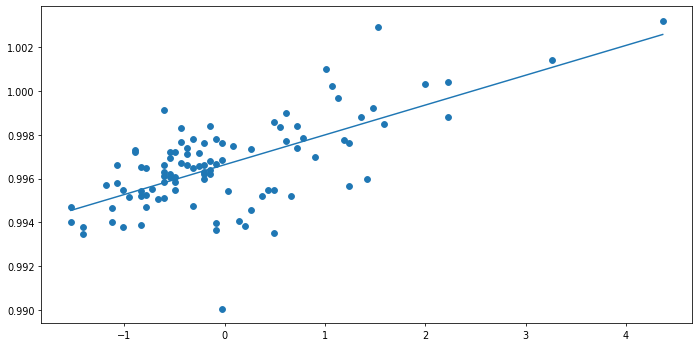

In [16]:

plt.rcParams['figure.dpi'] = 70
plt.rcParams['figure.figsize']=[12,6]
plt.scatter(x[:,1],y)
x_axis = np.ones((int(np.max(x)-np.min(x))*10,x.shape[1]))
x_axis[:,1:] = np.linspace(np.min(x),np.max(x),int(np.max(x)-np.min(x))*10)[np.newaxis].T
# x_axis = x_axis.T
# print(x_axis.shape)
y_axis = (prediction(parameters,x_axis))
plt.plot(x_axis[:,1],y_axis)

1.3659095385956372


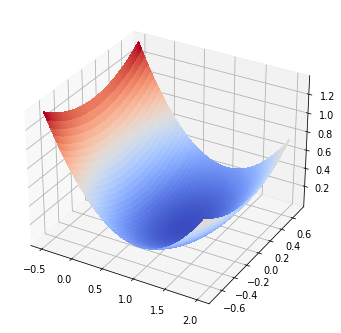

In [18]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.linspace(-0.5, 2, 1000)#np.arange(-0.01+ parameters[0,0] , 0.01+ parameters[0,0], 0.00025)
Y = np.linspace(-0.7, 0.7, 1000)#np.arange(-1+ parameters[0,1] , 1+ parameters[0,1], 0.025)
X, Y = np.meshgrid(X, Y)
Z = np.zeros(X.shape)
#for i in range(X.shape[0]):
#    for j in range(X.shape[1]):
#        Z[i][j] = loss_function(np.array([X[i][j],Y[i][j]]).reshape((1,2)),y,x)
for i in range(x.shape[0]):
        Z += np.square((X + Y*x[i][1]) - y[i])
Z /= 2 * x.shape[0]
print(np.max(Z))
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(0, 0.5000000000000001)
# ax.zaxis.set_major_locator(LinearLocator(10))
# # A StrMethodFormatter is used automatically
# ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()